Lya能量计算

In [2]:
import datetime
import time
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as spio   #用来读取sav格式
import numpy as np 
import csv 
#from scipy import interpolate
import scipy


sheet_xrs_time_1 = pd.read_csv('xrs_2010-2016_time.csv')
sheet_lya_time_1 = pd.read_csv('lya_2010-2016_time_change_1.csv')

sheet3_lya_time_2=sheet_lya_time_1.drop(index=[31,39]) #删除列
sheet3_lya_time_2=sheet3_lya_time_2.reset_index(drop=True) #重置索引

sheet3_xrs_time_2=sheet_xrs_time_1.drop(index=[31,39]) #删除列
sheet3_xrs_time_2=sheet3_xrs_time_2.reset_index(drop=True) #重置索引
print('序列删除完毕')

序列删除完毕


In [3]:
#lya时间列表记录，分辨率不同，需要分开运行,10s分辨率
import datetime
import time
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as spio   #用来读取sav格式
import numpy as np 
import csv 
#from scipy import interpolate
import scipy


time_start = time.time()

sheet_xrs_time = sheet3_xrs_time_2.reset_index(drop=True) #重置索引sheet_xrs_time
sheet_lya_time = sheet3_lya_time_2.reset_index(drop=True)
l_index=range(100)
sheet3_lya_time = pd.DataFrame()
sheet3_lya_value = pd.DataFrame()
lya_num_list_start=[] #把对应的中断的位置点记录下来，便于和后面的数值对应，不能直接记录时间，需要记录m
lya_num_list_end=[] #把对应的中断的位置点记录下来，便于和后面的数值对应，不能直接记录时间，需要记录m
list_year=[]
list_time_start=[]
list_time_end=[]
for i in range(len(sheet_lya_time['DATE'])):
    a=sheet_lya_time['DATE'][i].split('-')[0]+sheet_lya_time['DATE'][i].split('-')[1]+sheet_lya_time['DATE'][i].split('-')[2]
    if(a=='20150819'):#中断点，不记录
        print('20150819跳过数据')
        continue
    list_year.append(sheet_lya_time['DATE'][i].split('-')[0]+sheet_lya_time['DATE'][i].split('-')[1]+sheet_lya_time['DATE'][i].split('-')[2])
    list_time_start.append(int(sheet_lya_time['START'][i][0:2])*3600+int(sheet_lya_time['START'][i][3:5])*60+int(sheet_lya_time['START'][i][6:8]))
    list_time_end.append(int(sheet_lya_time['ENDT'][i][0:2])*3600+int(sheet_lya_time['ENDT'][i][3:5])*60+int(sheet_lya_time['ENDT'][i][6:8]))
#sheet_xrs = pd.DataFrame()
k=0
n=0
for  i in list_year:
    try: #处理文件不存在的情况
        print(i)
        if(n<list_year.index('20100409')):#2010年4月9日后的数据是g15
            sheet_lya = spio.readsav('/home/tzy/flare_data/sav/lc'+i+'_euve_g14.sav',python_dict=True, verbose=False)
        else:
            sheet_lya = spio.readsav('/home/tzy/flare_data/sav/lc'+i+'_euve_g15.sav',python_dict=True, verbose=False)
    except:
        print('该项数据文件缺少：',i)
        continue
    m=0
    break_out_flag = False #跳出整个循环的标志    
    if_flag = False #跳出整个循环的标志 
    b=[]
    for j in range(len(sheet_lya['tsecs'])):
        sheet3_lya_time.loc[m,n]=sheet_lya['tsecs'][j]-sheet_lya['tsecs'][0]#取一个当天最开始时间戳，后面的时间减这个时间得到的就是0时以后的秒数，可以转为时   
        sheet3_lya_value.loc[m,n]=sheet_lya['yclean'][j]#yclean的数据有两列，选第一列
        if(abs(list_time_start[n]-sheet3_lya_time.loc[m,n])<10) and (if_flag == False): #取一个阈值
            
            print('起始点:',sheet3_lya_time.loc[m,n])
            if_flag = True  #防止出现一个事件有两个起始点位
            lya_num_list_start.append(m)
            print('起始点位置已存入列表：',m)
        
        if((list_time_end[n]-sheet3_lya_time.loc[m,n])<10): #取一个阈值
            
            print('结束点:',sheet3_lya_time.loc[m,n])
            break_out_flag = True #满足条件，标记为True
            break   #选择在耀斑结束后一小时结束循环
        m=m+1;
    n=n+1;
    if(break_out_flag): #这里用了一个标志位一次性跳出嵌套循环
        lya_num_list_end.append(m)
        print('结束位置已存入列表：',m)
    else:
        lya_num_list_end.append(m-1)
        print('非结束位置：',m-1)
        
time_end = time.time()
print('Time cost = %fs' % (time_end - time_start))        

20150819跳过数据
20100409
起始点: 17049.34000003338
起始点位置已存入列表： 1558
结束点: 19713.740000009537
结束位置已存入列表： 1802
20100609
起始点: 31237.84000003338
起始点位置已存入列表： 2860
结束点: 32669.366999983788
结束位置已存入列表： 2991
20100731
起始点: 19476.162999987602
起始点位置已存入列表： 1783
结束点: 20197.047000050545
结束位置已存入列表： 1849
20101019
起始点: 47863.12300002575
起始点位置已存入列表： 4175
结束点: 48682.31299996376
结束位置已存入列表： 4250
20101023
起始点: 62825.64999997616
起始点位置已存入列表： 5749
结束点: 64640.15999996662
结束位置已存入列表： 5915
20101026
起始点: 11579.269999980927
起始点位置已存入列表： 1060
结束点: 14233.444000005722
结束位置已存入列表： 1303
20101110
起始点: 59571.299999952316
起始点位置已存入列表： 5454
结束点: 60456.02599990368
结束位置已存入列表： 5535
20101116
起始点: 10725.223999977112
起始点位置已存入列表： 980
结束点: 12091.22000002861
结束位置已存入列表： 1105
20110104
起始点: 34919.89999997616
起始点位置已存入列表： 3191
结束点: 35847.62999999523
结束位置已存入列表： 3276
20110126
起始点: 79362.91999995708
起始点位置已存入列表： 7169
结束点: 80411.48300004005
结束位置已存入列表： 7265
20110211
起始点: 78009.17700004578
起始点位置已存入列表： 7142
结束点: 79024.97300004959
结束位置已存入列表： 7235
20110212
起始点

起始点: 14516.194000005722
起始点位置已存入列表： 1329
结束点: 15292.384000062943
结束位置已存入列表： 1400
20160427
起始点: 339.96600008010864
起始点位置已存入列表： 31
结束点: 1748.9860000610352
结束位置已存入列表： 160
20160525
起始点: 6869.009999990463
起始点位置已存入列表： 629
结束点: 8497.174000024796
结束位置已存入列表： 778
20160528
起始点: 42696.61599993706
起始点位置已存入列表： 3909
结束点: 43341.72300004959
结束位置已存入列表： 3968
Time cost = 103.942682s


In [4]:
import time
time_start = time.time()


sheet3_lya_time_new_1=sheet3_lya_time
sheet3_lya_value_new_1=sheet3_lya_value

sheet3_lya_time_new_2=sheet3_lya_time_new_1.fillna(0)  #将nan值全部填充为0，防止计算异常
sheet3_lya_value_new_2=sheet3_lya_value_new_1.fillna(0)  #将nan值全部填充为0，防止计算异常

sheet4_lya_energy=[]
for n in range(sheet3_lya_time_new_2.shape[1]):
    a=0
    for m in range(lya_num_list_start[n],lya_num_list_end[n],1):
        if(sheet3_lya_time_new_2.loc[m+1][n]-sheet3_lya_time_new_2.loc[m][n])<0: #列表前后端有0值，后端0值减前面会出现负值
            continue
        if(sheet3_lya_value_new_2.loc[m+1][n]-sheet3_lya_value_new_2.loc[lya_num_list_start[n]][n])<0: #列表前后端有0值，后端0值减前面会出现负值
            continue
        
        a=a+(sheet3_lya_time_new_2.loc[m+1][n]-sheet3_lya_time_new_2.loc[m][n])*(sheet3_lya_value_new_2.loc[m+1][n]-sheet3_lya_value_new_2.loc[lya_num_list_start[n]][n])*1.406*10**(30)
    
    if(a==0):
        print(n)
        
    sheet4_lya_energy.append(a)
print('lya能量积分计算完毕')


time_end = time.time()
print('Time cost = %fs' % (time_end - time_start))

lya能量积分计算完毕
Time cost = 8.143466s


软XRS能量计算

In [5]:
#xrs时间列表记录，分辨率不同，需要分开运行,10s分辨率
import datetime
import time
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as spio   #用来读取sav格式
import numpy as np 
import csv 
#from scipy import interpolate
import scipy


time_start = time.time()

sheet_xrs_time = sheet3_xrs_time_2.reset_index(drop=True) #重置索引sheet_xrs_time
sheet_lya_time = sheet3_lya_time_2.reset_index(drop=True)
l_index=range(100)
sheet3_xrs_time = pd.DataFrame()
sheet3_xrs_value = pd.DataFrame()

xrs_num_list_start=[] #把对应的中断的位置点记录下来，便于和后面的数值对应，不能直接记录时间，需要记录m
xrs_num_list_end=[] #把对应的中断的位置点记录下来，便于和后面的数值对应，不能直接记录时间，需要记录m
xrs_list_year=[]
xrs_list_time_start=[]
xrs_list_time_end=[]
for i in range(len(sheet_lya_time['DATE'])):
    a=sheet_lya_time['DATE'][i].split('-')[0]+sheet_lya_time['DATE'][i].split('-')[1]+sheet_lya_time['DATE'][i].split('-')[2]
    if(a=='20150819'):#中断点，不记录
        print('20150819跳过数据')
        continue
    xrs_list_year.append(sheet_lya_time['DATE'][i].split('-')[0]+sheet_lya_time['DATE'][i].split('-')[1]+sheet_lya_time['DATE'][i].split('-')[2])
    xrs_list_time_start.append(int(sheet_xrs_time['START'][i][0:2])*3600+int(sheet_xrs_time['START'][i][3:5])*60+int(sheet_xrs_time['START'][i][6:8]))
    xrs_list_time_end.append(int(sheet_xrs_time['ENDT'][i][0:2])*3600+int(sheet_xrs_time['ENDT'][i][3:5])*60+int(sheet_xrs_time['ENDT'][i][6:8]))
#sheet_xrs = pd.DataFrame()
k=0
n=0
for  i in xrs_list_year:
    try: #处理文件不存在的情况
        print(i)
        if(n<xrs_list_year.index('20101019')):#2010年4月9日后的数据是g15
            sheet_xrs = spio.readsav('/home/tzy/flare_data/sav/lc'+i+'_xrs_g14.sav',python_dict=True, verbose=False)
        else:
            sheet_xrs = spio.readsav('/home/tzy/flare_data/sav/lc'+i+'_xrs_g15.sav',python_dict=True, verbose=False)
    except:
        
        print('该项数据文件缺少：',i)
        continue
    m=0
    break_out_flag = False #跳出整个循环的标志    
    if_flag = False #跳出整个循环的标志 
    b=[]
    for j in range(len(sheet_xrs['tsecs'])):
        sheet3_xrs_time.loc[m,n]=sheet_xrs['tsecs'][j]-sheet_xrs['tsecs'][0]#取一个当天最开始时间戳，后面的时间减这个时间得到的就是0时以后的秒数，可以转为时   
        sheet3_xrs_value.loc[m,n]=sheet_xrs['yclean'][0][j]#yclean的数据有两列，选第一列
        if(abs(xrs_list_time_start[n]-sheet3_xrs_time.loc[m,n])<4) and (if_flag == False): #取一个阈值
               #他们之差大致是时间分辨率，xrs是2s，ly是10s，这样便于确定数据的起始和结束的边界
            print('起始点:',sheet3_xrs_time.loc[m,n])
            if_flag = True  #防止出现一个事件有两个起始点位
            xrs_num_list_start.append(m)
            print('起始点位置已存入列表：',m)
        
        if((xrs_list_time_end[n]-sheet3_xrs_time.loc[m,n])<4): #取一个阈值
            
            print('结束点:',sheet3_xrs_time.loc[m,n])
            break_out_flag = True #满足条件，标记为True
            break   #选择在耀斑结束后一小时结束循环
        m=m+1;
    n=n+1;
    if(break_out_flag): #这里用了一个标志位一次性跳出嵌套循环
        xrs_num_list_end.append(m)
        print('结束位置已存入列表：',m)
    else:
        xrs_num_list_end.append(m-1)
        print('非结束位置：',m-1)
        
        
time_end = time.time()
print('Time cost = %fs' % (time_end - time_start))

20150819跳过数据
20100409
起始点: 17038.0
起始点位置已存入列表： 8319
结束点: 18117.0
结束位置已存入列表： 8846
20100609
起始点: 31137.0
起始点位置已存入列表： 15204
结束点: 31977.0
结束位置已存入列表： 15614
20100731
起始点: 18897.0
起始点位置已存入列表： 9227
结束点: 19917.0
结束位置已存入列表： 9725
20101019
起始点: 47936.94099998474
起始点位置已存入列表： 23402
结束点: 48537.0
结束位置已存入列表： 23695
20101023
起始点: 62936.324000000954
起始点位置已存入列表： 30731
结束点: 63837.43400001526
结束位置已存入列表： 31171
20101026
起始点: 11456.399999976158
起始点位置已存入列表： 5594
结束点: 11937.677000045776
结束位置已存入列表： 5829
20101110
起始点: 59636.83599996567
起始点位置已存入列表： 29120
结束点: 60357.72300004959
结束位置已存入列表： 29472
20101116
起始点: 10676.072999954224
起始点位置已存入列表： 5202
结束点: 11036.516000032425
结束位置已存入列表： 5378
20110104
起始点: 34977.2460000515
起始点位置已存入列表： 17048
结束点: 35337.69099998474
结束位置已存入列表： 17224
20110126
起始点: 79317.86699998379
起始点位置已存入列表： 38257
结束点: 79917.92200005054
结束位置已存入列表： 38550
20110211
起始点: 73796.49199998379
起始点位置已存入列表： 36034
结束点: 80816.95299994946
结束位置已存入列表： 39462
20110212
起始点: 38817.16400003433
起始点位置已存入列表： 18954
结束点: 39538.0470000505

起始点: 14456.804000139236
起始点位置已存入列表： 7059
结束点: 14997.473999977112
结束位置已存入列表： 7323
20160427
起始点: 176.13000011444092
起始点位置已存入列表： 86
结束点: 657.4070000648499
结束位置已存入列表： 321
20160525
起始点: 7137.299999952316
起始点位置已存入列表： 3485
结束点: 7557.140000104904
结束位置已存入列表： 3690
20160528
起始点: 42536.87700009346
起始点位置已存入列表： 20770
结束点: 44156.81999993324
结束位置已存入列表： 21561
Time cost = 623.689655s


In [6]:
import time
time_start = time.time()

sheet3_xrs_time_new_1=sheet3_xrs_time
sheet3_xrs_value_new_1=sheet3_xrs_value

sheet3_xrs_time_new_2=sheet3_xrs_time_new_1.fillna(0)  #将nan值全部填充为0，防止计算异常
sheet3_xrs_value_new_2=sheet3_xrs_value_new_1.fillna(0)  #将nan值全部填充为0，防止计算异常

sheet4_xrs_energy=[]
for n in range(sheet3_xrs_time_new_2.shape[1]):
    a=0
    for m in range(xrs_num_list_start[n],xrs_num_list_end[n],1):
        if(sheet3_xrs_time_new_2.loc[m+1][n]-sheet3_xrs_time_new_2.loc[m][n])<0: #列表前后端有0值，后端0值减前面会出现负值
            continue
        if(sheet3_xrs_value_new_2.loc[m+1][n]-sheet3_xrs_value_new_2.loc[xrs_num_list_start[n]][n])<0: #列表前后端有0值，后端0值减前面会出现负值
            continue
        
        a=a+(sheet3_xrs_time_new_2.loc[m+1][n]-sheet3_xrs_time_new_2.loc[m][n])*(sheet3_xrs_value_new_2.loc[m+1][n]-sheet3_xrs_value_new_2.loc[xrs_num_list_start[n]][n])*1.406*10**(30)
    if(a==0):
        print(n)
    sheet4_xrs_energy.append(a)
print('xrs能量积分计算完毕')

time_end = time.time()
print('Time cost = %fs' % (time_end - time_start))

xrs能量积分计算完毕
Time cost = 25.439568s


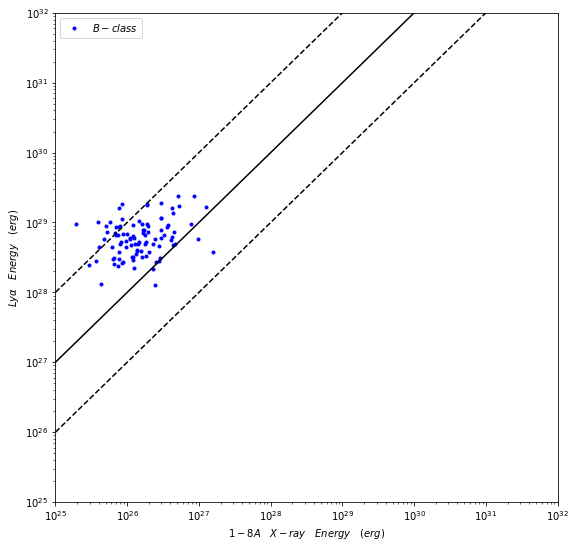

In [7]:
import datetime
import time
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
x=sheet4_xrs_energy
y=sheet4_lya_energy


#x2=[10**(0),10**(7)]
#y2=[10**(0),10**(7)]

x3=[10**(0),10**(6)]
y3=[10**(1),10**(7)]

x4=[10**(0),10**(5)]
y4=[10**(2),10**(7)]

x5=[10**(0),10**(4)]
y5=[10**(3),10**(7)]

#x6=[10**(0),10**(3)]
#y6=[10**(4),10**(7)]


plt.figure(figsize=(9, 9))
#plt.scatter(x, y)

x_new = np.divide(x, 10**(25))  #缩小量级，后续坐标轴重新定义坐标轴
y_new = np.divide(y, 10**(25))  #缩小量级，后续坐标轴重新定义坐标轴


plt.loglog(x_new, y_new,'b.',label=r'$B-class$')
#plt.loglog(x1,y1,'r.',label=r'$C-class$')

#plt.plot(x2,y2,'--',color='black')
plt.plot(x3,y3,'--',color='black')
plt.plot(x4,y4,'-',color='black')
plt.plot(x5,y5,'--',color='black')
#plt.plot(x6,y6,'--',color='black')

plt.ylim(10**(0),10**(7))
plt.xlim(10**(0),10**(7))
#Plot.xlim(10**(5), 10**(6));Plot.ylim(10**(5), 10**(6))

x_ticks = [10**(0),10**(1),10**(2),10**(3),10**(4),10**(5),10**(6),10**(7)]#用10^0来代替10^25，因为直接显示不了这么大
x_name = [r'$10^{25}$',r'$10^{26}$',r'$10^{27}$',r'$10^{28}$',r'$10^{29}$',r'$10^{30}$',r'$10^{31}$',r'$10^{32}$']
plt.xticks(x_ticks,x_name)  #设置坐标刻度

y_ticks = [10**(0),10**(1),10**(2),10**(3),10**(4),10**(5),10**(6),10**(7)]#用10^0来代替10^25，因为直接显示不了这么大
y_name = [r'$10^{25}$',r'$10^{26}$',r'$10^{27}$',r'$10^{28}$',r'$10^{29}$',r'$10^{30}$',r'$10^{31}$',r'$10^{32}$']
plt.yticks(y_ticks,y_name)  #设置坐标刻度


plt.xlabel(r'$1-8{A} \quad X-ray \quad Energy \quad (erg)$')
plt.ylabel(r'$Lyα \quad Energy \quad (erg)$')
plt.legend() #图例
plt.show()

In [8]:
np.savetxt('xrs_B.csv',sheet4_xrs_energy, delimiter = ',')
np.savetxt('lya_B.csv',sheet4_lya_energy, delimiter = ',')